In [ ]:
!pip install pandas numpy mathplotlib scikit-learn csaps

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from csaps import CubicSmoothingSpline
%matplotlib inline
plt.rcParams["figure.figsize"] = (9,8)

In [4]:
data= pd.read_csv('NASDAQ1.csv', sep=';', decimal=',')
data["Date"] = pd.to_datetime(data["Date"])
data.columns=['date', 'value']

In [5]:
df = data.copy()

In [6]:
df.head()

,date,value
0,2018-01-02,7006.899902
1,2018-01-03,7065.529785
2,2018-01-04,7077.910156
3,2018-01-05,7136.560059
4,2018-01-08,7157.390137


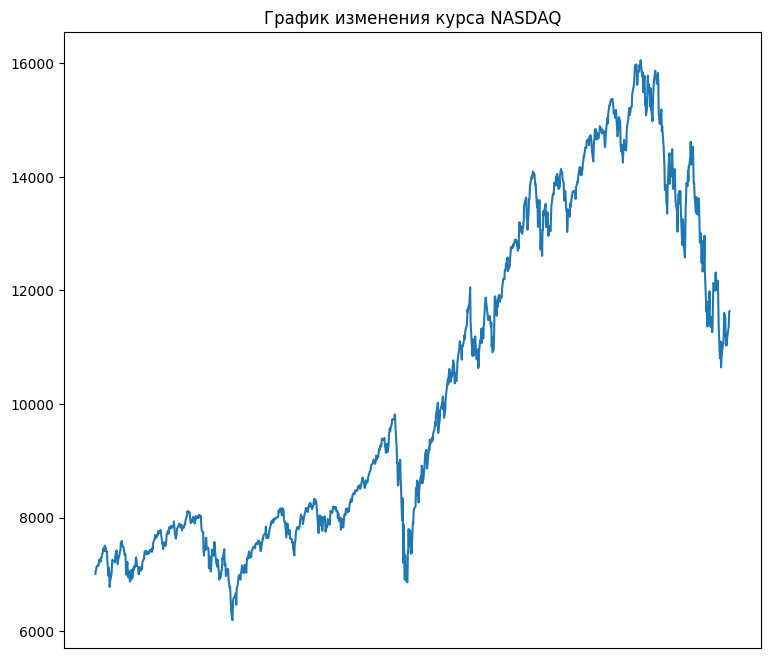

In [7]:
plt.plot(df['date'], df['value'])
plt.title('График изменения курса NASDAQ');
plt.xticks([])
plt.show()

In [9]:
x = (df.index +1).to_list()
y = df['value']
xi = np.arange(min(x), max(x), step=0.01)
yi = np.linspace(y.min(), y.max(), len(xi))

# Вариант 1. 
https://csaps.readthedocs.io/en/latest/
Аналог одноименной библиотеки в Matlab

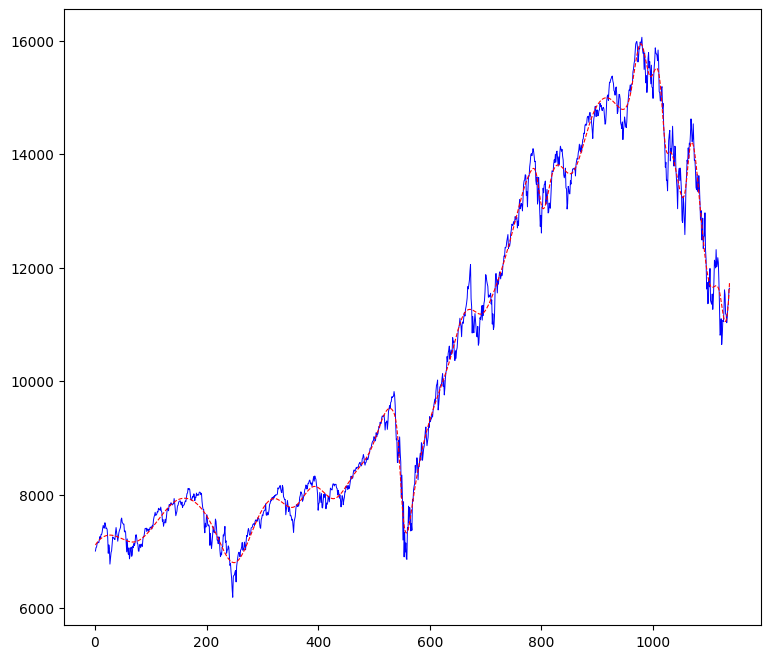

In [10]:
spline = UnivariateSpline(x, y, k=3, s=50000000)
plt.plot(x, y, 'b', linewidth=0.7)

plt.plot(xi, spline(xi), 'r--', linewidth=0.8)
plt.show()

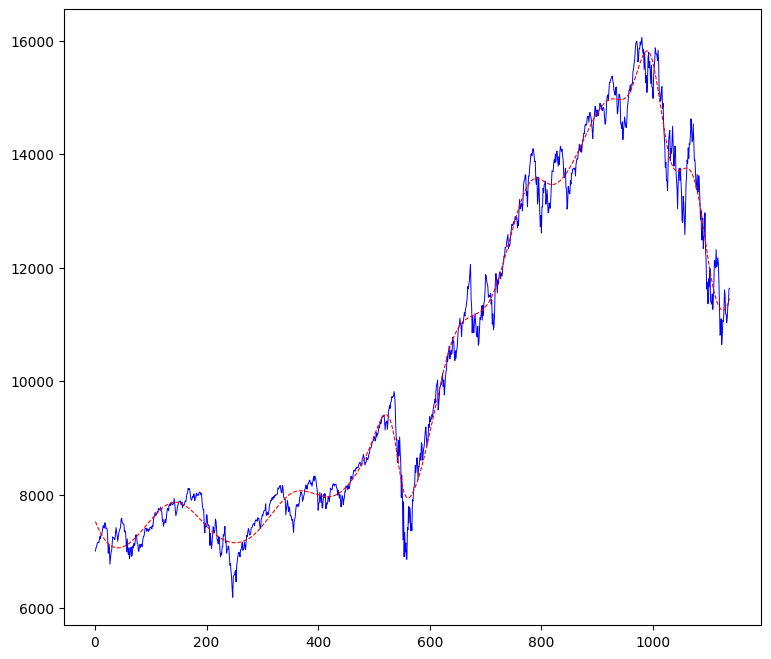

In [14]:
spline = UnivariateSpline(x, y, k=3, s=100000000)
plt.plot(x, y, 'b', linewidth=0.7)

plt.plot(xi, spline(xi), 'r--', linewidth=0.8)
plt.show()

In [129]:
spline.roots()

array([], dtype=float64)

In [140]:
spline.derivative(1)(xi)

array([ 131.30284327,  129.36133417,  127.43468953, ..., -324.05935947,
       -333.65965892, -343.33323939])

In [177]:
y


0        7006.899902
1        7065.529785
2        7077.910156
3        7136.560059
4        7157.390137
            ...     
1132    11127.849610
1133    11322.240230
1134    11361.849610
1135    11621.349610
1136    11635.309570
Name: value, Length: 1137, dtype: float64

In [175]:
spline(x)

array([ 7006.89995836,  7065.52949829,  7077.91078782, ...,
       11361.85207391, 11621.34836137, 11635.30982385])

In [126]:
y.head()

0    7006.899902
1    7065.529785
2    7077.910156
3    7136.560059
4    7157.390137
Name: value, dtype: float64

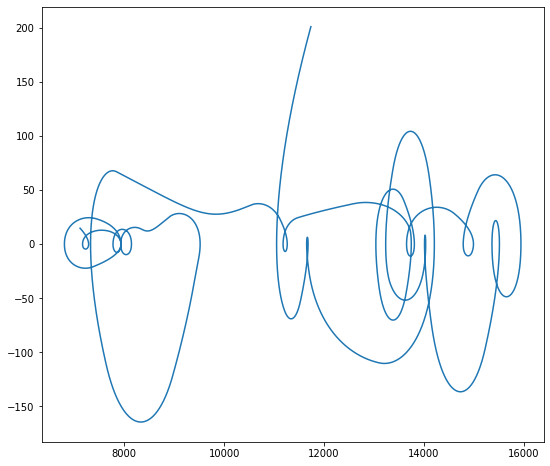

In [217]:
plt.plot(spline.derivative(0)(xi), spline.derivative(1)(xi))
plt.show();

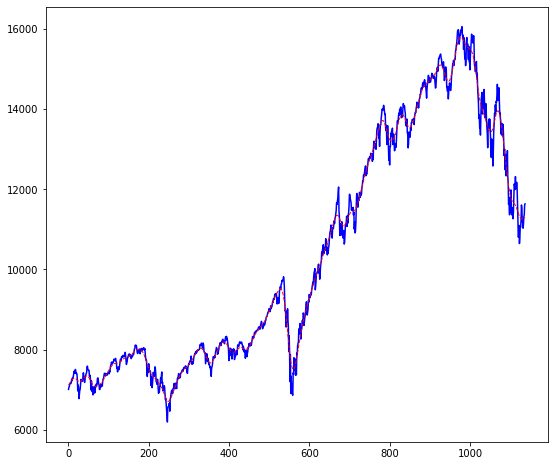

In [234]:
lmb = 0.000568
spline = CubicSmoothingSpline(x, y, smooth=lmb)
plt.plot(x, y, 'b')

plt.plot(x, spline(x), 'r--', linewidth=1)
plt.show()

In [236]:
spline(x)

array([ 7114.11781   ,  7130.70254437,  7147.22017116, ...,
       11287.90726276, 11296.28860399, 11304.88852098])

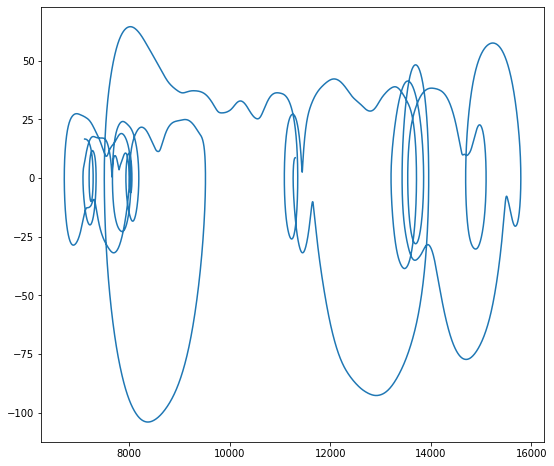

In [235]:
plt.plot(spline.spline.derivative(0)(xi), spline.spline.derivative(1)(xi))
plt.show();

In [191]:
spline(x)

array([ 7014.48744262,  7054.84644618,  7091.33412698, ...,
       11397.10405715, 11538.13327528, 11667.16907969])

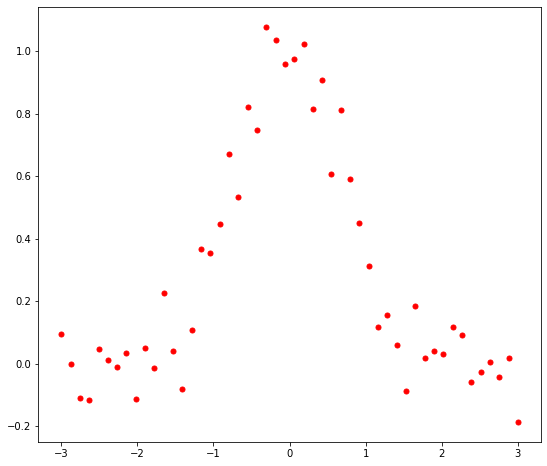

In [147]:
rng = np.random.default_rng()
x = np.linspace(-3, 3, 50)
y = np.exp(-x**2) + 0.1 * rng.standard_normal(50)
plt.plot(x, y, 'ro', ms=5)

# Второй вариант сплайна из scipy
https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.UnivariateSpline.html

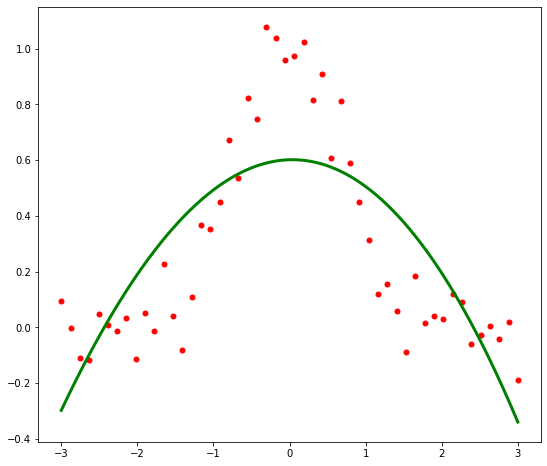

In [149]:

plt.plot(x, y, 'ro', ms=5)
spl = UnivariateSpline(x, y)
xs = np.linspace(-3, 3, 1000)
plt.plot(xs, spl(xs), 'g', lw=3)

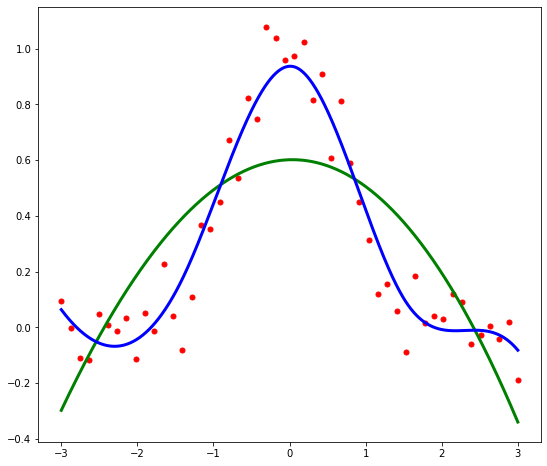

In [150]:
plt.plot(x, y, 'ro', ms=5)
plt.plot(xs, spl(xs), 'g', lw=3)
spl.set_smoothing_factor(0.5)
plt.plot(xs, spl(xs), 'b', lw=3)
plt.show()